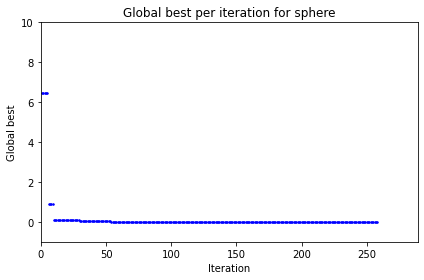

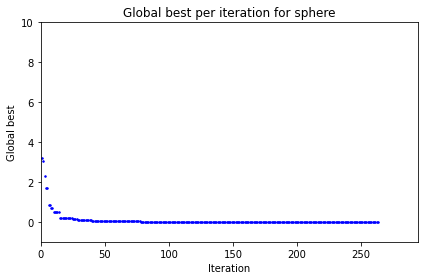

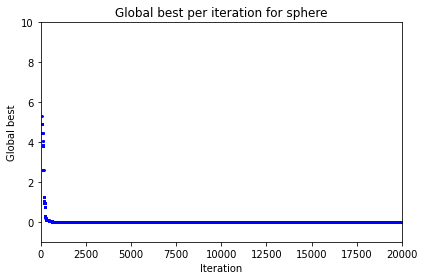

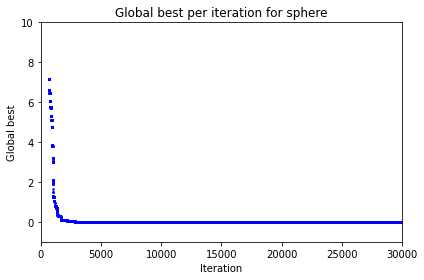

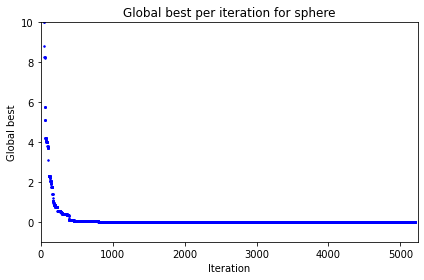

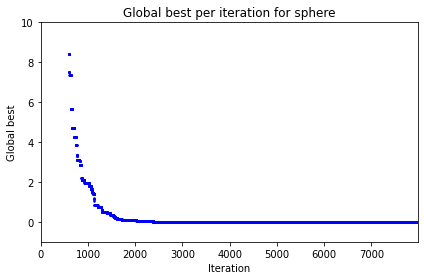

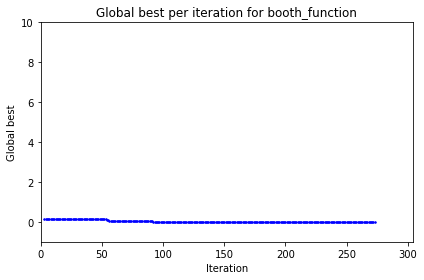

(array([3.76394688e-07, 7.45136148e-07]), 6.969008407749525e-13, 259)
(array([ 3.56759815e-07, -7.50003712e-07]), 6.897831336747822e-13, 264)
(array([ 5.56854678e-06, -6.42102897e-06, -2.34278179e-06, -8.16445273e-06,
       -2.91464067e-06, -5.94766592e-06, -7.35149692e-06, -1.01292072e-05,
        7.76092310e-06, -3.66370827e-06]), 4.185551317354773e-10, 20000)
(array([-2.61739508e-06, -7.79707567e-05,  7.55681490e-05,  2.64944354e-05,
        3.30635816e-05,  7.25798579e-06, -1.16530430e-05, -4.32141025e-05,
       -7.49870784e-05,  7.80729717e-05]), 2.736637161133796e-08, 30000)
(array([ 2.43320902e-09, -8.57712824e-08, -2.44283966e-07,  3.90019501e-07,
       -3.50106215e-08,  3.51924923e-07, -2.61979366e-08,  2.84271340e-08,
        2.08330369e-07,  1.16600782e-07,  1.09010739e-07,  1.41015290e-07,
       -4.05650704e-07,  4.31576810e-07, -1.69968750e-07,  8.91154991e-08,
       -9.23206007e-08, -3.16665580e-07,  1.18494807e-07, -7.95434840e-08]), 9.513001210308662e-13, 5210)
(ar

In [2]:
import math
import numpy as np
import random
from numpy.linalg import linalg
from matplotlib import pyplot as plt

# Sphere function with n dimensions
class Sphere:
    def __init__(self,n):
        self.n = n # n dimensions


    def sphere(self, x):
        sum = 0
        for i in range(0, self.n):
            sum = x[i]**2 + sum
        return sum


# booth function
def booth_function(x):
    return (x[0] + 2*x[1] -7)**2 + (2*x[0] + x[1] -5)**2

# A particle, each has has one position, one velocity and one stored local best.
class particle:
    def __init__(self, x, v, x_local):
        self.x = x # position
        self.v = v # velocity
        self.x_local = x_local # local best



# function : the objective function must have an argument that will be the position vector
# n : dimensions
# max_iter : number of iterations
# error : error for convergence criterion
# bounds : Absorbing walls
# true_sol : vector or position of the real global minimum
def PSO(function,n,max_iter,error,bounds,true_sol):

    if n > 10:
        N = 4*n +1 # N members
    elif n > 0:
        N = random.randint(20, 30) # N members

    inertia_max = 0.9
    inertia_min = 0.4

    c1 = 2
    c2 = 2

    # Initializations Positions are uniformly
    particles = []
    for i in range(N):
        position = np.array([])
        for j in range(n):
            position = np.append(position, np.random.uniform(bounds[j][0], bounds[j][1]))
        particles.append(particle(position,0,position))


    # iteration
    iter = 0

    # find global best
    global_best = particles[0].x
    for particl in particles:
        if function(particl.x) < function(global_best):
            global_best = particl.x

    x_axis = []
    y_axis = []

    while iter < max_iter:

        y_axis.append(function(global_best)) # Store global best value for diagram.

        inertia = inertia_max - iter*(inertia_max - inertia_min)/max_iter # Update Inertia

        for particl in particles:
            r1 = random.random()
            r2 = random.random()

            # Update velocity
            v = inertia * particl.v + c1*r1*(particl.x_local - particl.x) + c2*r2*(global_best - particl.x)
            particl.v = v
            # Update  position
            particl.x = particl.x + v

            # Apply boundaries
            for i in range(n):
                if particl.x[i] < bounds[i][0]:
                    particl.x[i] = bounds[i][0]
                elif particl.x[i] > bounds[i][1]:
                    particl.x[i] = bounds[i][1]


            # check local
            if function(particl.x) < function(particl.x_local):
                particl.x_local = particl.x
                # check global
                if function(particl.x) < function(global_best):
                    global_best = particl.x
        iter = iter + 1
        if linalg.norm(global_best - true_sol) < error: # Convergence Criterion
            break


    #print y_axis min(y_axis)-10 max(y_axis)+5
    plt.axis([0, iter+30, -1, 10])
    plt.plot(range(0,iter), y_axis, color = 'none', linestyle = 'dashed', linewidth =2, marker = 'o', markersize = 1.5, markerfacecolor = 'blue', markeredgecolor = 'blue')
    plt.title("Global best per iteration for " + function.__name__)
    plt.ylabel('Global best')
    plt.xlabel('Iteration')
    plt.tight_layout()
    plt.show()
    return global_best, function(global_best), iter


s1 = Sphere(2)
s2 = Sphere(10)
s3 = Sphere(20)

bounds = [[-10, 10], [-100, 100]]
bounds1 = [[-10,10] for x in range(10)]
bounds2 = [[-100,100] for x in range(10)]
bounds3 = [[-10,10] for x in range(20)]
bounds4 = [[-100,100] for x in range(20)]


solution1 = PSO(s1.sphere, 2, 500, math.pow(10, -6), bounds, np.zeros(2))
solution2 = PSO(s1.sphere, 2, 500, math.pow(10, -6), bounds, np.zeros(2))
solution3 = PSO(s2.sphere, 10, 20000, math.pow(10, -6), bounds1, np.zeros(10))
solution4 = PSO(s2.sphere, 10, 30000, math.pow(10, -6), bounds2, np.zeros(10))
solution5 = PSO(s3.sphere, 20, 20000, math.pow(10, -6), bounds3, np.zeros(20))
solution6 = PSO(s3.sphere, 20, 30000, math.pow(10, -6), bounds4, np.zeros(20))
solution7 = PSO(booth_function,2,500,math.pow(10,-6),bounds,np.array([1,3]))


print(solution1)
print(solution2)
print(solution3)
print(solution4)
print(solution5)
print(solution6)
print(solution7)


